In [30]:
from google.colab import files

uploaded = files.upload()

Saving income.csv to income.csv


In [31]:
#imports and all modules needed
from sklearn.cluster import KMeans
#imports the KMeans class from the cluster module in the scikit-learn (sklearn) machine learning library.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler is used to normalize numerical features by scaling each value into a specified range—usually from 0 to 1.
#useful when you want to have all features on the same scale
from matplotlib import pyplot as plt
%matplotlib inline
#It tells the notebook to display matplotlib plots directly inside the notebook, right below the code cell that produces the plot.
#Without this command, plots may open in a separate window or not show up at all.



In [32]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


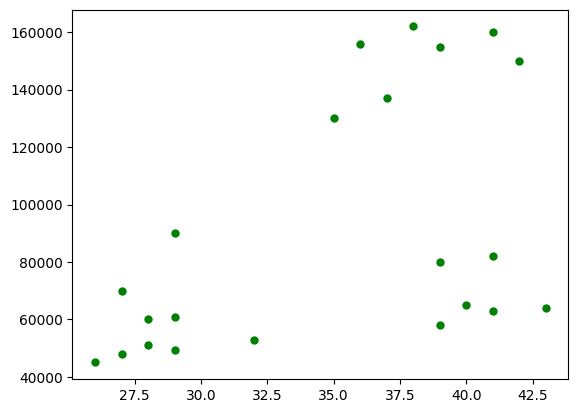

In [33]:
plt.scatter(df["Age"], df["Income($)"], label = "Point", color = "g", marker = ".", s=100)

In [37]:
km = KMeans(n_clusters = 3)
km



KMeans(n_clusters=3)

This initializes a new KMeans object and sets the number of clusters to 3.
When we fit this object to our data, it will divide our data points into 3
separate clusters based on their feature similarities.

In [27]:
predicted = km.fit_predict(df[["Age","Income($)"]])
predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

This code performs clustering using the KMeans algorithm and predicts which cluster each data point belongs to, based on the "Age" and "Income($)" columns in your DataFrame.

km.fit_predict(): - This method first fits the KMeans model to the data (finds cluster centers), then predicts and returns the cluster label (0, 1, or 2, since n_clusters=3) for each row.


In [39]:
df["Predicted_Cluster"] = predicted
df.head()
#adding the predicted cluster to our dataframe

,Name,Age,Income($),Predicted_Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [40]:
df1 = df[df.Predicted_Cluster == 0]
df2 = df[df.Predicted_Cluster == 1]
df3 = df[df.Predicted_Cluster == 2]
#splitting our data frame based on the clusters predicted

/tmp/ipython-input-3640268560.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


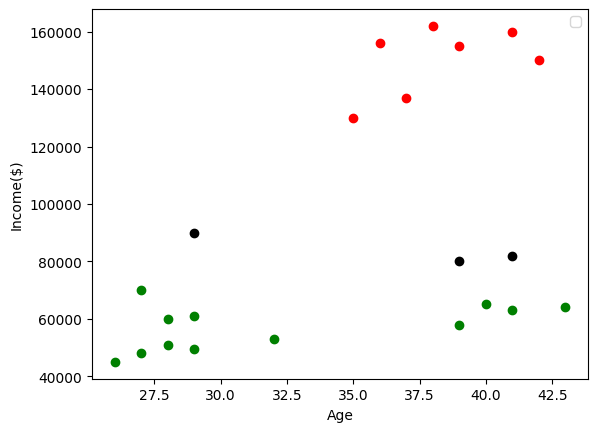

In [43]:
plt.scatter(df1.Age,df1["Income($)"], color = 'green')
plt.scatter(df2.Age,df2["Income($)"], color = 'red')
plt.scatter(df3.Age,df3["Income($)"], color = 'black')


plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

bad clustering because of bad scaling
Y axis has a huge scale whereas X axis has a really small scale

We need to pre process using Min Max scalar to bring down both to similar scales

In [49]:
scaler = MinMaxScaler()

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),Predicted_Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


scaler = MinMaxScaler() -
Creates a scaler object that will scale your data, usually to the range.

scaler.fit(df[['Income($)']]) -
Learns the minimum and maximum values of the Income column in your dataframe. "Fit" means calculate these statistics from your actual data.

df['Income($)'] = scaler.transform(df[['Income($)']]) -
Transforms (scales) each value in your "Income($)" column to a number between 0 and 1, using the formula:
data point - min datapoint/ maxdata point - min datapoint

In [51]:
# Doing same for Age column also
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()


,Name,Age,Income($),Predicted_Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [52]:
km = KMeans(n_clusters = 3)
predicted = km.fit_predict(df[["Age","Income($)"]])
predicted


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [53]:
df["Predicted_Cluster"] = predicted
df.head()

,Name,Age,Income($),Predicted_Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [55]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

The attribute km.cluster_centers_ from your KMeans model km contains the coordinates of the cluster centers centroids that the algorithm found during clustering.

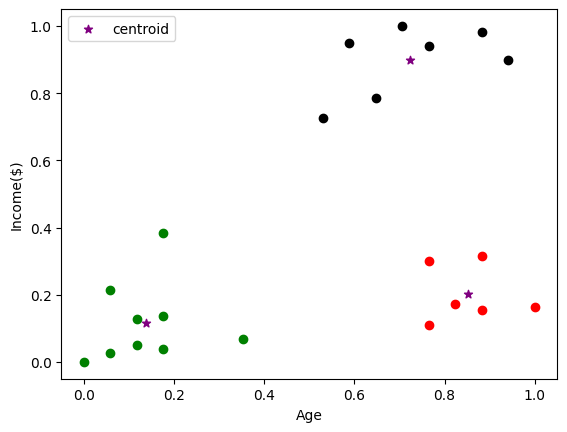

In [56]:
df1 = df[df.Predicted_Cluster == 0]
df2 = df[df.Predicted_Cluster == 1]
df3 = df[df.Predicted_Cluster == 2]

plt.scatter(df1.Age,df1["Income($)"], color = 'green')
plt.scatter(df2.Age,df2["Income($)"], color = 'red')
plt.scatter(df3.Age,df3["Income($)"], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "purple", marker = "*", label = "centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [57]:
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[["Age","Income($)"]])
  sse.append(km.inertia_)

Tryna get the elbow plot to try and figure out optimum K in case of very large datasets or multiple number of features

In [58]:
sse

[5.434011511988176,
 2.345614491472593,
 0.4750783498553095,
 0.3923766528801945,
 0.3510596000355857,
 0.23436626485472345,
 0.18427868455224797,
 0.14832554654516628,
 0.11901156280536995]

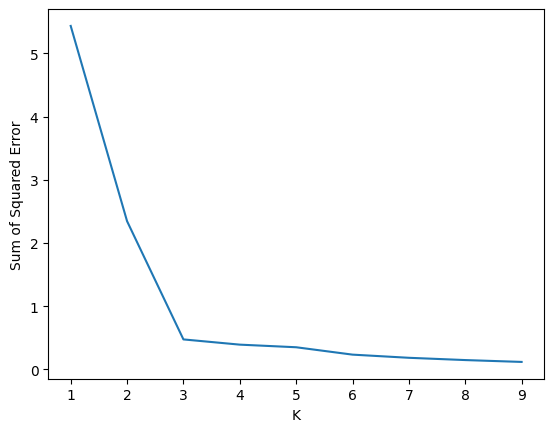

In [59]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range, sse)

k=3 is optimum for this one